In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
from configs import project_config
import matplotlib.pyplot as plt
import seaborn as sns
from configs.RecursiveVPSDE.Markovian_fBiPotDDims.recursive_Markovian_PostMeanScore_fBiPot12Dims_T256_H05_tl_110data_StbleTgt import get_config


In [2]:
num_paths = 10240
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"
config = get_config()

In [3]:
def get_drift_files(config, root_dir):
    ts_type = f"{config.ndims}DDims"
    include = (f"_{num_paths}NPaths_{config.t0}t0_{config.deltaT:.3e}dT_").replace(".", "")
    root_nadaraya_dir = root_dir + f"ExperimentResults/Nadaraya/12DDims/"
    true_files = []
    local_files = []
    global_files = []
    for file in os.listdir(root_nadaraya_dir):
        if "IIDNadaraya" in file and ts_type in file and include in file:
            if "true" in file:
                true_files.append(root_nadaraya_dir+file)
            elif "global" in file:
                global_files.append(root_nadaraya_dir+file)
            elif "local" in file:
                local_files.append(root_nadaraya_dir+file)
    assert len(true_files)>0, "No true files found"
    assert len(local_files)>0, "No local files found"
    def extract_bw_number(s):
        match = s.split("/")[-1].split("_")[4][:-2]
        return float("0." + match)
    true_files = sorted(true_files, key=extract_bw_number)
    local_files = sorted(local_files, key=extract_bw_number)
    global_files = sorted(global_files, key=extract_bw_number)
    bws = [extract_bw_number(f) for f in true_files]
    idx = np.argwhere(np.isclose(np.array(bws), 0.0031549)).flatten()[0] - 1
    true_files = true_files[idx]
    local_files = local_files[idx]
    global_files = global_files[idx]
    return true_files, local_files, global_files, bws

In [4]:
true_nadaraya_files, local_nadaraya_files, global_nadaraya_files, bws = get_drift_files(config=config, root_dir=root_dir)

In [5]:
def get_score_drift_files(root_dir, ts_type):
    root_score_dir = root_dir + f"ExperimentResults/TSPM_Markovian/12DDims/"
    driftoostrack_true_files = []
    driftoostrack_local_files = []
    driftoostrack_global_files = []
    for file in os.listdir(root_score_dir):
        if "_MLP_" in file and ts_type in file:
            if "DriftTrack" in file and "true" in file:
                driftoostrack_true_files.append(root_score_dir+file)
            elif "DriftTrack" in file and "global" in file:
                driftoostrack_global_files.append(root_score_dir+file)
            elif "DriftTrack" in file and "local" in file:
                driftoostrack_local_files.append(root_score_dir+file)
    assert len(driftoostrack_true_files)>0, "No oos drift track files found"
    assert len(driftoostrack_local_files)>0, "No oos drift track files found"
    assert(len(driftoostrack_true_files) == len(driftoostrack_true_files))
    def extract_bw_drift_track_number(s):
        match = s.split("Nep_")[0].split("_")[-1]
        return int(match)
    driftoostrack_true_files = sorted(driftoostrack_true_files, key=extract_bw_drift_track_number)
    driftoostrack_local_files = sorted(driftoostrack_local_files, key=extract_bw_drift_track_number)
    driftoostrack_global_files = sorted(driftoostrack_global_files, key=extract_bw_drift_track_number)
    Nepochs_track = [extract_bw_drift_track_number(f) for f in driftoostrack_true_files]
    print((np.array(Nepochs_track)))
    idx = np.argwhere(np.array(Nepochs_track)==500).flatten()[0]
    driftoostrack_true_files = driftoostrack_true_files[idx]
    driftoostrack_local_files = driftoostrack_local_files[idx]
    driftoostrack_global_files = driftoostrack_global_files[idx]
    return driftoostrack_true_files, driftoostrack_local_files,driftoostrack_global_files, Nepochs_track

In [6]:
from configs.RecursiveVPSDE.Markovian_fBiPotDDims.recursive_Markovian_PostMeanScore_fBiPot12Dims_T256_H05_tl_110data_StbleTgt import get_config as get_score_config
score_config = get_score_config()
ts_type = f"ST_{config.feat_thresh:.3f}FTh_fBiPot_{config.ndims}DDims".replace(".", "")
true_score_files, local_score_files, global_score_files, Nepochs_track = get_score_drift_files(ts_type=ts_type, root_dir=root_dir)

[  1   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106
 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142
 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178
 180 182 184 186 188 190 192 194 196 198 200 202 204 206 208 210 212 214
 216 218 220 222 224 226 228 230 232 234 236 238 240 242 244 246 248 250
 252 254 256 258 260 262 264 266 268 270 272 274 276 278 280 282 284 286
 288 290 292 294 296 298 300 302 304 306 308 310 312 314 316 318 320 322
 324 326 328 330 332 334 336 338 340 342 344 346 348 350 352 354 356 358
 360 362 364 366 368 370 372 374 376 378 380 382 384 386 388 390 392 394
 396 398 400 402 404 406 408 410 412 414 416 418 420 422 424 426 428 430
 432 434 436 438 440 442 444 446 448 450 452 454 456 458 460 462 464 466
 468 470 472 474 476 478 480 482 484 486 488 490 49

In [7]:
local_score_files

'/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/TSPM_Markovian/12DDims/TSPM_MLP_ST_0010FTh_fBiPot_12DDims_OOSDriftTrack_500Nep_00t0_3906e-03dT_025a_-20b_00c_10ResLay_2LFac_BetaMax20e+01_local_states.npy'

In [14]:
score_true = np.load(true_score_files)
score_global = np.load(global_score_files)
nad_true = np.load(true_nadaraya_files)
nad_global = np.load(global_nadaraya_files)
score_true=score_true.reshape(-1,score_true.shape[2], score_true.shape[-1])
score_global=score_global.reshape(-1,score_global.shape[2], score_global.shape[-1])
nad_true=nad_true.reshape(-1,nad_true.shape[2], nad_true.shape[-1])
nad_global=nad_global.reshape(-1,nad_global.shape[2], nad_global.shape[-1])
true_paths = np.load(score_config.data_path)

(51400,)


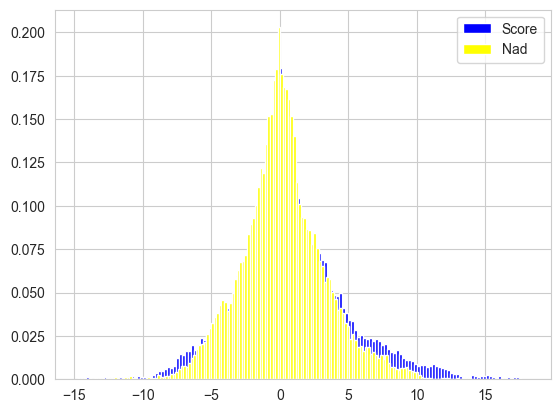

(51400,)


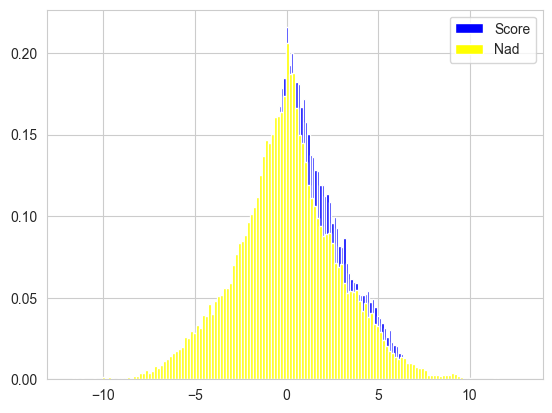

(51400,)


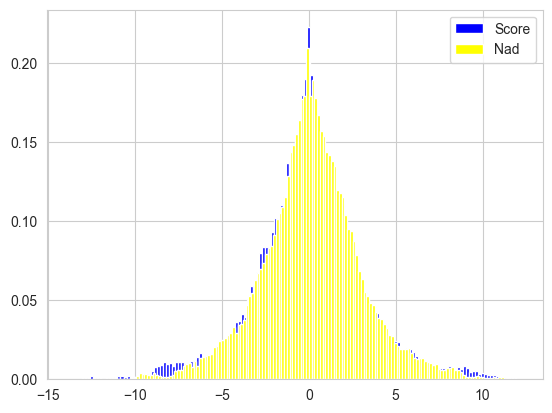

(51400,)


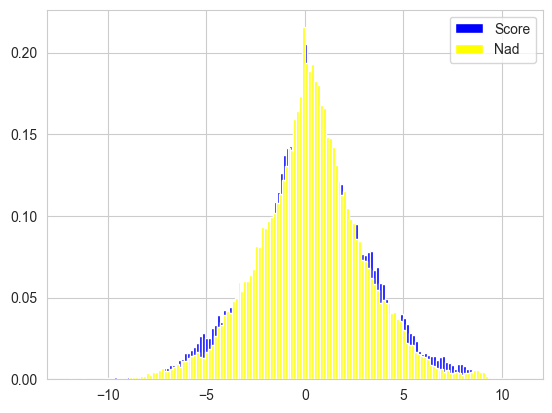

(51400,)


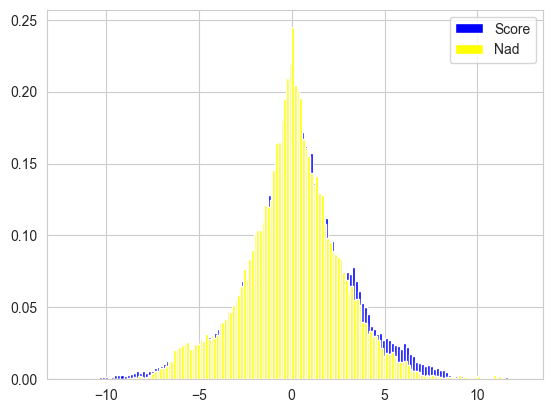

(51400,)


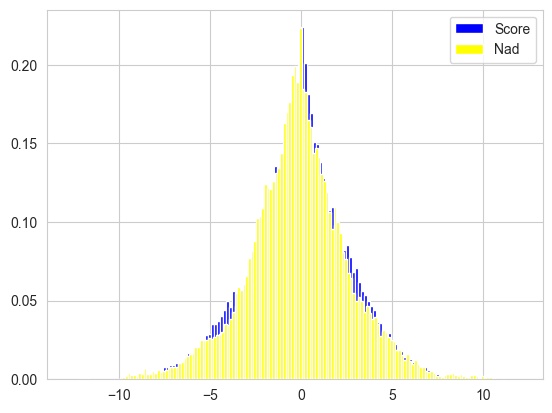

(51400,)


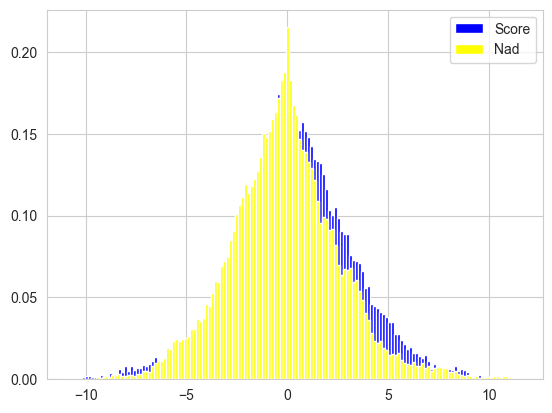

(51400,)


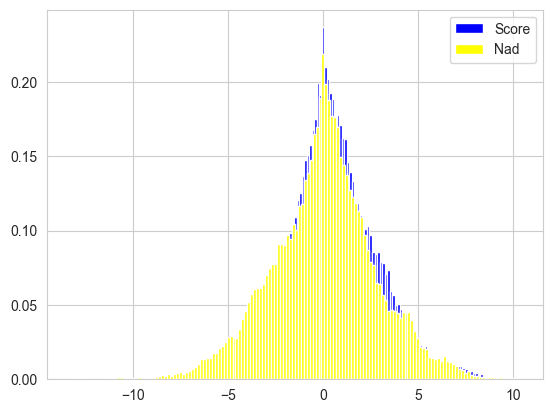

(51400,)


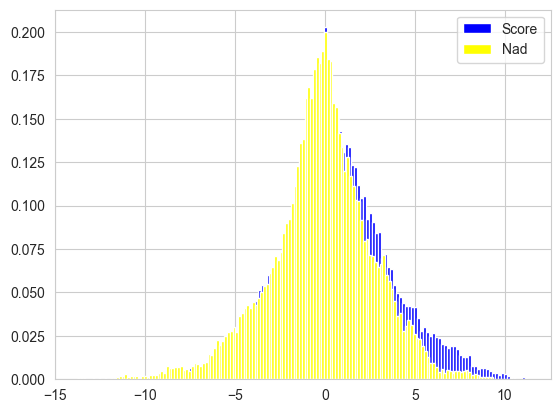

(51400,)


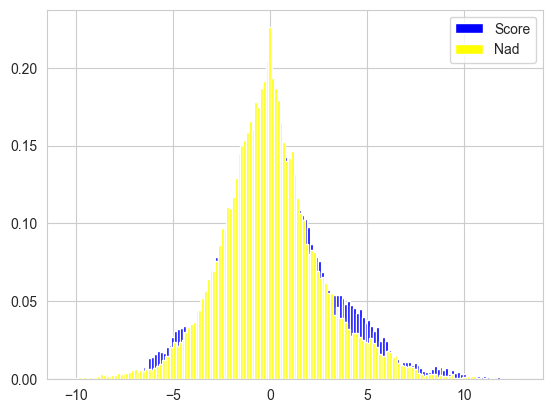

(51400,)


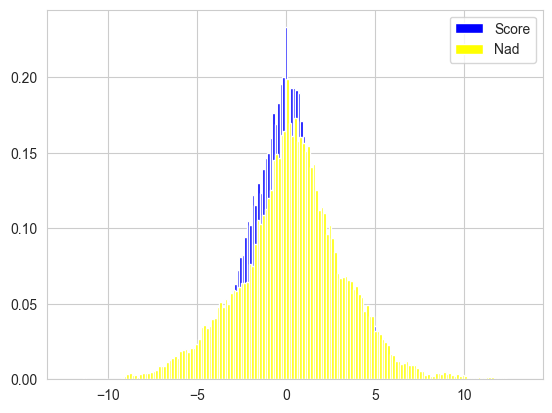

(51400,)


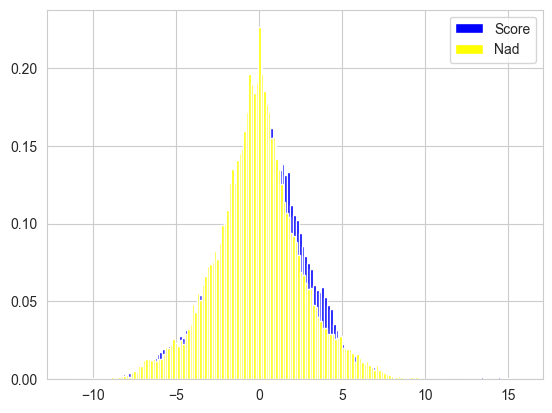

In [18]:
for d in range(score_global.shape[-1]):
    print(nad_true[:,:, d].flatten().shape)
    plt.hist(score_global[:,:, d].flatten(), bins=150, color="blue",density=True,label="Score")
    plt.hist(nad_global[:,:, d].flatten(), bins=150, color="yellow",density=True,label="Nad")
    #plt.hist(true_paths[:,:, d].flatten(), bins=150, color="red",density=True,label="True")
    plt.legend()
    plt.show()
    plt.close()